<a href="https://colab.research.google.com/github/vigneshwar315/machinelearning/blob/main/MLAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset used :
Indian_Prime_Diabetes

In [ ]:
import pandas as pd
df = pd.read_csv("/content/pimaindiansdiabetes.csv")
print(df.columns)
X = df.drop("Class", axis=1).values
y = df["Class"].values
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


(b) Split the data at random into one set (X_train, y_train) containing 80% of the instances, which will be used for training + validation, and a testing set (X_test, y_test) (containing remaining instances).

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)




(c) Give the objective of logistic regression with L2 regularization.
Logistic regression is used to predict the probability that an input belongs to class 1. It uses the sigmoid function:
 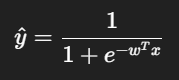

To train the model, we minimize the cross-entropy loss (also called log-loss), which measures how well the predicted probabilities match the actual labels. It is defined as:

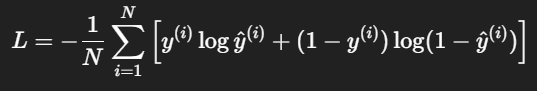

If the true label is 1, the loss is small only when the predicted probability is close to 1.

If the true label is 0, the loss is small only when the predicted probability is close to 0.

Wrong predictions with high confidence are punished heavily, while correct confident predictions give very low loss. To prevent overfitting, we add an L2 regularization penalty on the weights:

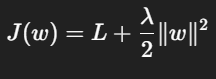

The first term, cross-entropy, ensures that the model makes accurate predictions, while the second term, regularization, discourages the weights from becoming too large. The regularization parameter λ controls the balance between these two objectives: when λ is small, the model remains flexible but risks overfitting to the training data, and when λ is large, the model becomes simpler but may underfit, failing to capture important patterns.

In short, logistic regression with L2 regularization tries to predict correctly while keeping weights small, which improves generalization to new data.



(d) Run logistic regression on the data using L2 regularization, varying the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000}. Plot on one graph the average cross-entropy for the training data and the testing data (averaged over all instances), as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on the third graph the actual values of the weights obtained (one curve per weight). Finally, plot on a graph the accuracy on the training and test set. Explain briefly what you see.
As the regularization parameter λ increases, the model’s behavior changes significantly. With very small λ, the model fits the training data extremely well but risks overfitting. As λ grows, the weights shrink, training loss rises, but test loss initially improves before also increasing due to underfitting. Accuracy shows the same trend: high on training for small λ, but generalization improves around moderate values of λ.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_loss, test_loss = [], []
train_acc, test_acc = [], []
w_norms, weights = [], []

for lam in lambdas:
    C_val = 1e12 if lam == 0 else 1/lam
    clf = LogisticRegression(penalty="l2", C=C_val, solver="liblinear", max_iter=2000)
    clf.fit(X_train, y_train)
    p_tr = clf.predict_proba(X_train)[:, 1]
    p_te = clf.predict_proba(X_test)[:, 1]
    train_loss.append(log_loss(y_train, p_tr))
    test_loss.append(log_loss(y_test, p_te))
    train_acc.append(accuracy_score(y_train, clf.predict(X_train)))
    test_acc.append(accuracy_score(y_test, clf.predict(X_test)))


    w = clf.coef_.flatten()
    weights.append(w)
    w_norms.append(np.linalg.norm(w))
weights = np.vstack(weights)

# 1) Cross-entropy
plt.plot(lambdas, train_loss, marker='o', label="Train Loss")
plt.plot(lambdas, test_loss, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ")
plt.legend()
plt.show()

# 2) L2 norm of weights
plt.plot(lambdas, w_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||2")
plt.title("Weight Norm vs λ")
plt.show()

# 3) Weights vs λ
for i in range(weights.shape[1]):
    plt.plot(lambdas, weights[:, i], marker='o', label=f"w{i}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight value")
plt.title("Weights vs λ")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# 4) Accuracy
plt.plot(lambdas, train_acc, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_acc, marker='o', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ")
plt.legend()
plt.show()


Cross-Entropy Loss vs λ
For very small λ i.e almost no regularization, train loss is low, but test loss is a bit higher → sign of overfitting.

As λ increases, train loss goes up slightly, but test loss becomes better/stable.

For very large λ, both losses increase

Weight Norm vs λ

As λ increases, the L2 norm of weights shrinks.

This shows regularization is forcing weights to be smaller.

Weights vs λ

Individual weights start with larger values at small λ.

As λ grows, they move closer to 0, showing the effect of regularization.

Accuracy vs λ

Training accuracy is highest at small λ.

Test accuracy usually peaks at a moderate λ (e.g., 1 or 10).

Very high λ reduces both accuracies (underfitting).

(e) Re-format the data in the following way: take each of the input variables, and feed it through a set of Gaussian basis functions, defined as follows. For each variable (except the bias term), use 5 univariate basis functions with means evenly spaced between -10 and 10 and variance σ. You will experiment with σ values of 0.1, 0.5, 1, 5 and 10.

In [ ]:
import numpy as np
def gaussian_basis_expansion(X, sigma):
    n_samples, n_features = X.shape
    mus = np.linspace(-10, 10, 5)
    basis = []
    for j in range(n_features):
        for mu in mus:
            phi = np.exp(- (X[:, j] - mu)**2 / (2 * sigma**2))
            basis.append(phi)
    basis = np.array(basis).T
    return np.hstack([np.ones((n_samples, 1)), basis])

X_train_phi = gaussian_basis_expansion(X_train, sigma=1)
X_test_phi  = gaussian_basis_expansion(X_test, sigma=1)

print("Original shape:", X_train.shape)
print("Expanded shape:", X_train_phi.shape)

When we apply Gaussian basis functions with different values of σ, we change how “localized” the new features are:

Small σ (e.g., 0.1, 0.5): The basis functions are very narrow, meaning each one responds strongly only to inputs near its center. This makes the model very flexible, able to capture fine details of the training data.

Result: Very low training error but higher test error -> overfitting (low bias, high variance).
Moderate σ (around 1 or 5): The basis functions are smoother, overlapping more across the input space. This allows the model to capture general patterns without fitting noise.

Result: Balanced training and testing errors -> best generalization (bias-variance tradeoff is optimal).
Large σ (e.g., 10): The basis functions are very wide and flat, so they lose the ability to capture local variations. The model becomes too simple.

Result: Training and testing errors both increase -> underfitting (high bias, low variance).
(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off

(f) Using no regularization and doing regression with this new set of basis functions, plot the training and testing error as a function of σ (when using only basis functions of a given σ). Add constant lines showing the training and testing error you had obtained in part c. Explain how σ influences overfitting and the bias-variance trade-off

In [ ]:
sigmas = [0.1, 0.5, 1, 5, 10]
train_errors, test_errors = [], []

for sigma in sigmas:
    X_train = gaussian_basis_expansion(X_train, sigma)
    X_test = gaussian_basis_expansion(X_test, sigma)

    clf = LogisticRegression(max_iter=2000)
    clf.fit(X_train, y_train)
    p_tr = clf.predict_proba(X_train)[:, 1]
    p_te = clf.predict_proba(X_test)[:, 1]
    train_errors.append(log_loss(y_train, p_tr))
    test_errors.append(log_loss(y_test, p_te))
plt.plot(sigmas, train_errors, marker='o', label="Train Error")
plt.plot(sigmas, test_errors, marker='o', label="Test Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Error vs σ (No Regularization)")
plt.legend()
plt.show()


When σ is very small (0.1, 0.5):

The model fits training data very well (low train error),

But test error increases (overfitting due to narrow Gaussians).

When σ is very large (5, 10):

Both train and test errors increase (too smooth, underfitting).

At moderate σ (≈1):

Best balance between bias and variance,

Train and test errors are close and reasonably low.

(g) Add in all the basis function and perform regularized regression with the regularization parameter λ ∈ {0, 0.1, 1, 10, 100, 1000, 10000}. Plot on one graph the average cross- entropy error for the training data and the testing data, as a function of λ (you should use a log scale for λ). Plot on another graph the L2 norm of the weight vector you obtain. Plot on a different graph the L2 norm of the weights for the set of basis functions corresponding to each value of σ, as a function of λ (this will be a graph with 5 lines on it). Explain briefly the results.

In [ ]:
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]

train_loss, test_loss = [], []
w_norms, sigma_w_norms = [], {s: [] for s in sigmas}
def full_basis_expansion(X, sigmas):
    Phi_list = [gaussian_basis_expansion(X, s) for s in sigmas]
    return np.hstack(Phi_list)

X_train_full = full_basis_expansion(X_train, sigmas)
X_test_full = full_basis_expansion(X_test, sigmas)

for lam in lambdas:
    C_val = 1e12 if lam == 0 else 1/lam
    clf = LogisticRegression(max_iter=5000)
    clf.fit(X_train_full, y_train)
    p_tr = clf.predict_proba(X_train_full)[:, 1]
    p_te = clf.predict_proba(X_test_full)[:, 1]
    train_loss.append(log_loss(y_train, p_tr))
    test_loss.append(log_loss(y_test, p_te))
    w = clf.coef_.flatten()
    w_norms.append(np.linalg.norm(w))
    start = 0
    for s in sigmas:
        end = start + gaussian_basis_expansion(X_train, s).shape[1]
        sigma_w_norms[s].append(np.linalg.norm(w[start:end]))
        start = end
plt.figure(figsize=(6,4))
plt.plot(lambdas, train_loss, marker='o', label="Train Loss")
plt.plot(lambdas, test_loss, marker='o', label="Test Loss")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Cross-Entropy Loss")
plt.title("Train/Test Loss vs λ")
plt.legend()
plt.show()
plt.figure(figsize=(6,4))
plt.plot(lambdas, w_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||w||2")
plt.title("L2 Norm of Weights vs λ")
plt.show()
plt.figure(figsize=(6,4))
for s in sigmas:
    plt.plot(lambdas, sigma_w_norms[s], marker='o', label=f"σ={s}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("||wσ||2")
plt.title("Weight Norms per σ vs λ")
plt.legend()
plt.show()


Training & Testing Error vs λ

Small λ (weak regularization): training error is low, but test error is higher (overfitting).

Large λ (strong regularization): both train and test errors rise (underfitting).

Moderate λ (≈1 or 10) gives the best trade-off.

L2 Norm of Weights vs λ

As λ increases, the weight vector shrinks → norms become smaller.

Stronger regularization forces the model to keep coefficients small, preventing overfitting.

Weight Norms per σ vs λ

For small σ (0.1, 0.5): weights are large when λ is small → these basis functions overfit quickly.

For larger σ (5, 10): weights stay smaller and smoother.

As λ increases, all weight norms shrink, but small-σ features shrink faster.

Conclusion: Regularization helps control overfitting, especially for high-variance (small σ) basis functions.

(h) Explain what you would need to do if you wanted to design a set of Gaussian basis functions that capture relationships between the inputs. Explain the impact of this choice on the bias-variance trade-off. No experiments are needed (although you are welcome to explore this on your own).

In the earlier parts, Gaussian basis functions were applied independently to each feature. This means we only transformed each variable on its own, without looking at interactions between them.

But in real data (like medical or financial data), features may work together to influence the output. For example : In breast cancer data, the combination of mean radius and mean texture might be more informative than either feature alone.

To capture these relationships, we can use multivariate Gaussian basis functions, which depend on multiple input variables:

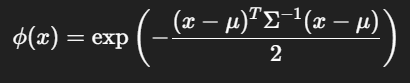



Here, μ is the center vector, and Σ is the covariance matrix that defines the shape of the Gaussian.

Impact on bias-variance tradeoff:

Using multivariate basis functions makes the model more flexible (lower bias).

But it also increases the number of parameters and risk of overfitting (higher variance).

Regularization becomes crucial to control this added complexity.

In short, to capture feature relationships, we need multivariate Gaussians. This improves expressiveness but increases the risk of overfitting.

(i) Suppose that instead of wanting to use a fixed set of evenly-spaced basis functions, you would like to adapt the placement of these functions. Derive a learning algorithm that computes both the placement of the basis function, μi and the weight vector w from data (assuming that the width σ is fixed). You should still allow for L2 regularization of the weight vector. Note that your algorithm will need to be iterative.


So far, the Gaussian means (µ) were fixed and evenly spaced. But this may not always be the best choice. Instead, we can learn both the centers µi and the weights w from data.

This is similar to how Radial Basis Function (RBF) networks work.

Algorithm outline:

1.Initialize centers µi (randomly, or using clustering like k-means).

2.Fix σ (width of Gaussians).

3.Define the model:


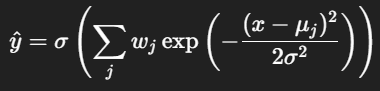

4.Define loss function with regularization:

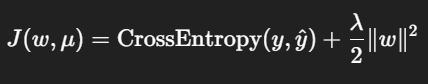

5.Update weights (w) using gradient descent (same as logistic regression).

6.Update centers (µ) using gradient descent too:

Compute the derivative of the loss wrt µ.
Shift µ towards regions of input space where it improves prediction.

7.Repeat until convergence.


Interpretation:

The model learns not only how strong each basis function is (weights) but also where the Gaussians should be placed in feature space.

This makes the basis functions data-driven rather than fixed.

(j) Does your algorithm converge? If so, does it obtain a locally or globally optimal solution? Explain your answer

The algorithm that learns both the weights
𝑤 and the centers 𝜇 using gradient descent does converge, but the type of solution depends on which parameters we are optimizing:

When centers 𝜇 are fixed: optimizing the weights 𝑤 with L2 regularization is a convex problem. Gradient descent is guaranteed to converge to the global optimum.

When centers 𝜇 are also updated: the optimization problem becomes non-convex. In this case, gradient descent will still converge, but only to a local optimum. The final solution depends on the initial placement of the centers 𝜇.

Conclusion: The algorithm does converge, but it generally finds a locally optimal solution, not a globally optimal one. Different initializations of 𝜇 may lead to different results.



Question 2
Experiment on any complex datasets to demonstrate the Linear REGRESSION and its versions, and logistic regression (CLASSIFICATION) along with complete data preprocessing steps. Note: You should not show your lab practices for this question.

Slope: 0.36231469352113377
Intercept: 1.849294204459948
R^2 Score: 0.23561797203963397
MAE: 0.5749664687393711
RMSE: 0.706773042831321


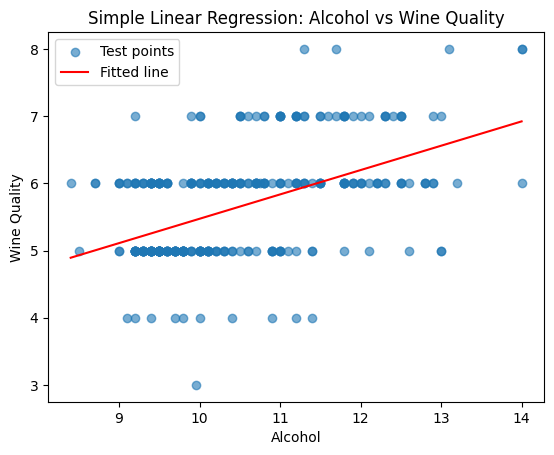

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
X = df[['alcohol']].values
y = df['quality'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Slope:", lr.coef_[0])
print("Intercept:", lr.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", rmse)
plt.scatter(X_test, y_test, alpha=0.6, label="Test points")
x_line = np.linspace(X_test.min(), X_test.max(), 200).reshape(-1, 1)
plt.plot(x_line, lr.predict(x_line), 'r', label="Fitted line")
plt.xlabel("Alcohol")
plt.ylabel("Wine Quality")
plt.title("Simple Linear Regression: Alcohol vs Wine Quality")
plt.legend()
plt.show()

Intercept: 5.623924941360438
            Feature  Coefficient
0           alcohol     0.327014
1  volatile acidity    -0.207569
2         sulphates     0.108490
MSE: 0.4005775807750832
RMSE: 0.6329119850145699
MAE: 0.519991394386857
R^2 Score: 0.387032916341121


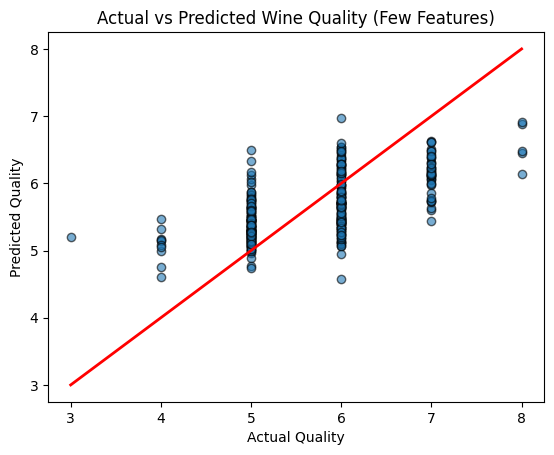

In [2]:
# MULTILINEAR REGRESSION
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
selected_features = ['alcohol', 'volatile acidity', 'sulphates']
X = df[selected_features]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
print("Intercept:", lr.intercept_)
coef_df = pd.DataFrame({
    "Feature": selected_features,
    "Coefficient": lr.coef_
})
print(coef_df)
y_pred = lr.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual vs Predicted Wine Quality (Few Features)")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linewidth=2)
plt.show()

Intercept: -10.664942334226966

Coefficients:
                 Feature  Coefficient
0          fixed acidity     0.055273
1       volatile acidity    -2.175912
2            citric acid     0.417257
3         residual sugar     0.080036
4              chlorides    -0.923927
5    free sulfur dioxide     0.029366
6   total sulfur dioxide    -0.025307
7                density    -0.003900
8                     pH    -0.804134
9              sulphates     2.340019
10               alcohol     0.983649

Confusion Matrix:
 [[272   5]
 [ 29  14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       277
           1       0.74      0.33      0.45        43

    accuracy                           0.89       320
   macro avg       0.82      0.65      0.70       320
weighted avg       0.88      0.89      0.88       320

Accuracy Score: 0.89375


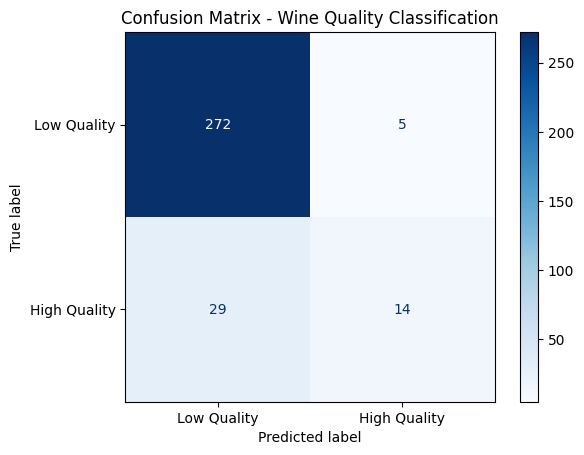

In [3]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay)
import matplotlib.pyplot as plt
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')
df['HighQuality'] = (df['quality'] >= 7).astype(int)
features = df.columns.drop(['quality', 'HighQuality']).tolist()
X = df[features]
y = df['HighQuality']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Intercept:", log_reg.intercept_[0])
coef_df = pd.DataFrame({"Feature": features, "Coefficient": log_reg.coef_[0]})
print("\nCoefficients:")
print(coef_df)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
disp = ConfusionMatrixDisplay.from_estimator(
    log_reg,
    X_test,
    y_test,
    display_labels=["Low Quality", "High Quality"],
    cmap=plt.cm.Blues
)
plt.title("Confusion Matrix - Wine Quality Classification")
plt.show()